In [55]:
import os
import cv2
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow import keras
from tensorflow.keras import Model, Input, optimizers

from PIL import Image

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split



In [19]:
import os
print(os.listdir("./cell-images/cell_images"))

['Parasitized', 'Uninfected']


In [20]:
infected = os.listdir('./cell-images/cell_images/Parasitized/') 
uninfected = os.listdir('./cell-images/cell_images/Uninfected/')

In [21]:
#retrieving the images and storing them in the arrays
data = []
labels = []

for i in infected:
    try:
    
        image = cv2.imread("./cell-images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        data.append(np.array(resize_img))
        
        labels.append(1)
        
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("./cell-images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((64 , 64))
        
        data.append(np.array(resize_img))
        
        labels.append(0)
        
    except AttributeError:
        print('')

In [22]:
cells = np.array(data)
labels = np.array(labels)
cells.shape,labels.shape

((27558, 64, 64, 3), (27558,))

In [23]:
#Shuffle the data
cells,labels = shuffle(cells,labels)


In [24]:
cells = cells.astype("float32")/255
labels = tf.keras.utils.to_categorical(labels)


In [25]:
x_train,x_test,y_train,y_test = train_test_split(cells,labels,test_size=0.33,random_state=45)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18463, 64, 64, 3), (9095, 64, 64, 3), (18463, 2), (9095, 2))

In [26]:
input_tensor = Input(shape=x_train.shape[1:])

vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [27]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [46]:
#Create new tuned model for vgg16
#tuned_vgg16_model = Sequential()

#input layer
#tuned_vgg16_model.add(Conv2D(64, (3, 3), input_shape=x_train.shape[1:]))
#tuned_vgg16_model.add(Activation('relu'))

last = vgg16_model.output
x = Flatten()(last)
preds = Dense(2, activation='softmax')(x)

tuned_vgg16_model = Model(vgg16_model.input, preds)

In [47]:
tuned_vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
__________

In [48]:
'''
#vgg16_model.layers.pop(0)
#tuned_vgg16_model.add(layer)

#add the vgg16 model's layers to the new tuned 
for layer in vgg16_model.layers:
    layer.trainable = False
    tuned_vgg16_model.add(layer)
    
#pop the prediction layer of tuned vgg16 model
tuned_vgg16_model.layers.pop()
'''

"\n#vgg16_model.layers.pop(0)\n#tuned_vgg16_model.add(layer)\n\n#add the vgg16 model's layers to the new tuned \nfor layer in vgg16_model.layers:\n    layer.trainable = False\n    tuned_vgg16_model.add(layer)\n    \n#pop the prediction layer of tuned vgg16 model\ntuned_vgg16_model.layers.pop()\n"

In [49]:
#tuned_vgg16_model.add(Dense(2, activation='softmax'))

In [50]:
#tuned_vgg16_model.summary()

In [52]:
tuned_vgg16_model.compile(optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
history = tuned_vgg16_model.fit(x_train, y_train, batch_size=64, epochs=8, validation_split=0.15)

Train on 15693 samples, validate on 2770 samples
Epoch 1/8
15693/15693 [==============================] - 1882s 120ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 2/8
15693/15693 [==============================] - 1869s 119ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 3/8
15693/15693 [==============================] - 1870s 119ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 4/8
15693/15693 [==============================] - 1864s 119ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 5/8
15693/15693 [==============================] - 1868s 119ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 6/8
15693/15693 [==============================] - 1863s 119ms/sample - loss: 8.0318 - acc: 0.5017 - val_loss: 8.2627 - val_acc: 0.4874
Epoch 7/8
15693/15693 [==============================] - 1871s 119ms/sample - loss: 8.0318 - acc: 0

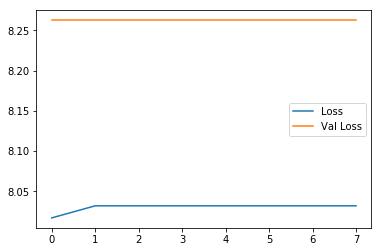

In [35]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label="Val Loss")
plt.legend()

In [56]:
accuracy  = tuned_vgg16_model.evaluate(x_test,y_test)
print("Test Accuracy:-",accuracy)

9095/9095 [==============================] - 235s 26ms/sample - loss: 8.0440 - acc: 0.5009
Test Accuracy:- [8.04398413674395, 0.5009346]
